<a href="https://colab.research.google.com/github/Ashish032002/Image_Captioning/blob/main/Image_Captioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openai torchvision --quiet


In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import base64
import openai
import os
import requests
import matplotlib.pyplot as plt

openai.api_key = "your_openai_key"


In [ ]:

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485], std=[0.229])
])


class ImageSATEncoder(nn.Module):
    def __init__(self):
        super(ImageSATEncoder, self).__init__()
        base = models.densenet121(pretrained=True)
        self.encoder = base.features
        self.pool = nn.AdaptiveAvgPool2d((1, 1))
        self.linear = nn.Linear(1024, 768)

    def forward(self, x):
        with torch.no_grad():
            x = self.encoder(x)
            x = self.pool(x).view(x.size(0), -1)
        return self.linear(x)

sat_encoder = ImageSATEncoder().eval()


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
def encode_image(path):
    img = Image.open(path).convert("RGB")
    img_tensor = transform(img).unsqueeze(0)
    embedding = sat_encoder(img_tensor)
    return embedding.squeeze().tolist()

def convert_image_to_base64(path):
    with open(path, "rb") as img_file:
        return f"data:image/jpeg;base64,{base64.b64encode(img_file.read()).decode()}"


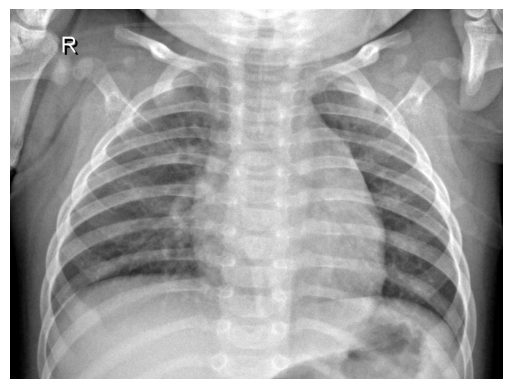

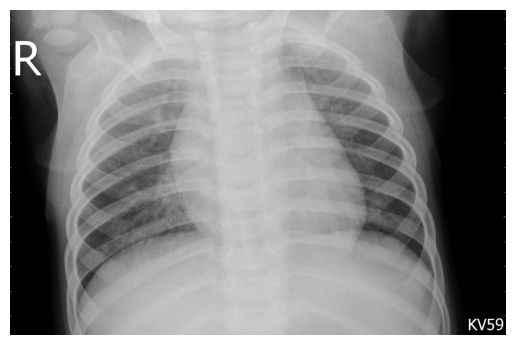

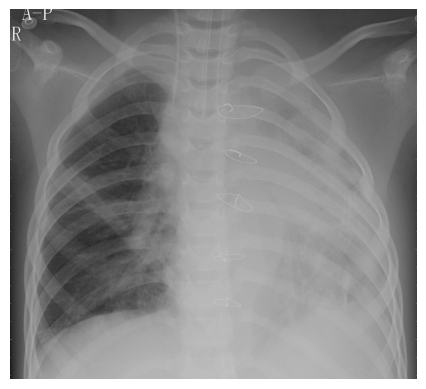

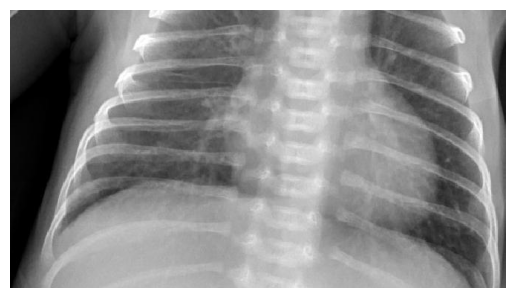

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485], std=[0.229])
])


image_paths = [
    "/content/sample_data/NORMAL-9902588-0001.jpeg",
    "/content/sample_data/VIRUS-9677398-0002.jpeg",
    "/content/sample_data/VIRUS-987036-0002.jpeg",
    "/content/sample_data/VIRUS-990412-0009.jpeg"
]


images = []
for path in image_paths:
    img = Image.open(path).convert('RGB')
    img_t = transform(img).unsqueeze(0).to(device)
    images.append((img, img_t))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()



In [ ]:
import openai

client = openai.OpenAI(api_key="your_openai_key")

def generate_radiology_report(image_path):
    image_base64 = convert_image_to_base64(image_path)

    response = client.chat.completions.create(
        model="gpt-4-turbo",
        messages=[
            {
                "role": "system",
                "content": "You are a professional radiologist generating radiology reports."
            },
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": "Please analyze this chest X-ray and provide a detailed medical radiology report including any abnormalities, findings, or impressions."},
                    {"type": "image_url", "image_url": {"url": image_base64, "detail": "high"}}
                ]
            }
        ],
        max_tokens=700
    )

    return response.choices[0].message.content




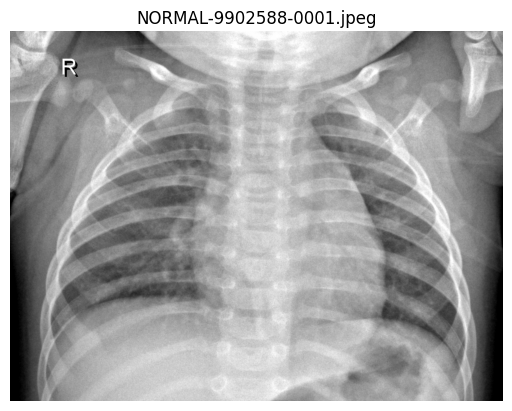


Radiology Report for NORMAL-9902588-0001.jpeg:
### Radiology Report

**Patient Information:** [Anonymized]

**Examination:** Chest X-ray (PA view)

**Date of Examination:** [Date not provided]

**Clinical History:** [Details not provided]

**Comparison:** [Previous imaging not available for comparison]

**Findings:**
- **Lungs and Pleura:** There is an increased opacity in the right middle to lower lung zones, suggesting a consolidation pattern. No significant pleural effusion noted. The left lung field appears clear without obvious focal lesion or consolidation.
- **Heart and Mediastinum:** The cardiac silhouette appears within normal limits in size and contour. No mediastinal widening is evident.
- **Bones and Soft Tissues:** The visualized osseous structures appear intact without evident fractures or lytic lesions. Soft tissue is normal.
- **Diaphragm and Costophrenic Angles:** The diaphragm is well visualized with sharp costophrenic angles. No evidence of blunting to suggest effus

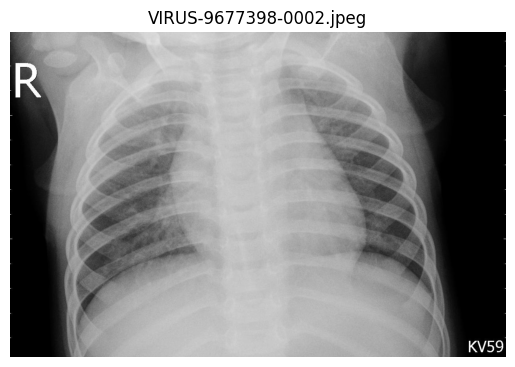


Radiology Report for VIRUS-9677398-0002.jpeg:
### Radiology Report

**Patient Information:** Not Provided  
**Exam Type:** Chest X-ray (PA View)  
**Date of Exam:** Not Provided  
**Radiologist:** [Your Name]

#### Clinical Information:
No clinical history provided.

#### Technique:
Frontal chest radiograph (PA view)

#### Findings:
1. **Cardiomediastinal Contours**: The cardiomediastinal silhouette is within normal limits for size and contour.
2. **Lungs and Pleura**: Both lungs are well expanded. There is no evidence of focal consolidation, pleural effusion, or pneumothorax. The lung fields generally appear clear without visible masses or nodules.
3. **Bones and Soft Tissues**: Appears intact with no visible fractures, dislocations, or bony lesions. The soft tissues of the chest wall are unremarkable.
4. **Diaphragms and Costophrenic Angles**: The diaphragms are well-defined, and the costophrenic angles are sharp with no evidence of blunting, suggesting no pleural effusions.
5. **Ot

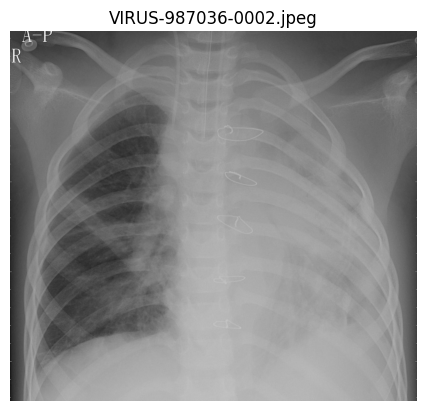


Radiology Report for VIRUS-987036-0002.jpeg:
### Radiology Report: Chest X-ray Analysis

**Patient Information:** [Not available]

**Date of Exam:** [Not provided]

**Technique:** Anteroposterior (AP) upright chest X-ray.

**Comparison:** None available.

### Findings:
1. **Lung Fields and Pulmonary Parenchyma:**
   - There is a significant opacity visible in the right upper lung zone. This is of considerable density and could suggest a consolidation, such as pneumonia, or possibly a mass. Further cross-sectional imaging (e.g., CT chest) is recommended for better characterization.
   
2. **Mediastinum and Hilum:**
   - The cardiac silhouette is not clearly delineated in this AP projection, which generally makes assessment of cardiac size and mediastinal contours less accurate than in a PA (posteroanterior) view.
   - Mediastinal structures are obscured by overlying opacity; no obvious widening is noted though detailed evaluation is compromised.

3. **Pleura:**
   - No visible pleural 

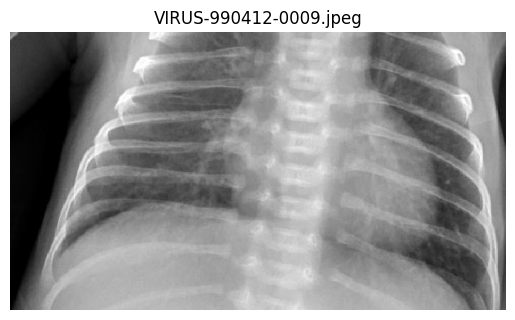


Radiology Report for VIRUS-990412-0009.jpeg:
### Radiology Report: Chest X-ray Analysis

**Patient Information:** [Not Provided]  
**Date of Study:** [Not Provided]  
**Technique:** PA view of the chest.

#### Findings:
1. **Lungs and Pleura:** There is evidence of increased opacity in the left mid to lower lung zones, which may suggest the presence of a consolidation, possibly due to infection or inflammatory causes such as pneumonia. The visualization of the right lung is within normal limits with no obvious masses, nodules, or significant infiltrates discernible.
  
2. **Cardiac Silhouette and Mediastinum:** The cardiac silhouette appears to be normal in size. The mediastinal contours are within normal limits, with no evident widening or masses.

3. **Bones and Soft Tissues:** The visible osseous structures show no signs of acute fracture or dislocation. The soft tissue planes appear normal.

4. **Diaphragm and Costophrenic Angles:** The diaphragm is intact with sharp costophrenic 

In [ ]:

image_paths = [
    "/content/sample_data/NORMAL-9902588-0001.jpeg",
    "/content/sample_data/VIRUS-9677398-0002.jpeg",
    "/content/sample_data/VIRUS-987036-0002.jpeg",
    "/content/sample_data/VIRUS-990412-0009.jpeg"
]

for path in image_paths:
    img = Image.open(path).convert("RGB")
    plt.imshow(img)
    plt.axis('off')
    plt.title(os.path.basename(path))
    plt.show()

    report = generate_radiology_report(path)
    print(f"\nRadiology Report for {os.path.basename(path)}:\n{report}")
    print("=" * 100)
